In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv("data/imputed_data.csv")
print(df.columns)

Index(['Name', 'Position', 'College', 'Round', 'Pick', 'Stat URL', 'Height',
       'Weight', '40 Yard Dash', 'Bench Press', 'Vertical Jump', 'Broad Jump',
       '3 Cone Drill', 'Shuttle', 'conf_abbr', 'games', 'seasons',
       'tackles_solo', 'tackles_assists', 'tackles_total', 'tackles_loss',
       'sacks', 'def_int', 'def_int_yds', 'def_int_td', 'pass_defended',
       'fumbles_rec', 'fumbles_rec_yds', 'fumbles_rec_td', 'fumbles_forced',
       'rec', 'rec_yds', 'rec_yds_per_rec', 'rec_td', 'rush_att', 'rush_yds',
       'rush_yds_per_att', 'rush_td', 'scrim_att', 'scrim_yds',
       'scrim_yds_per_att', 'scrim_td', 'Year'],
      dtype='object')


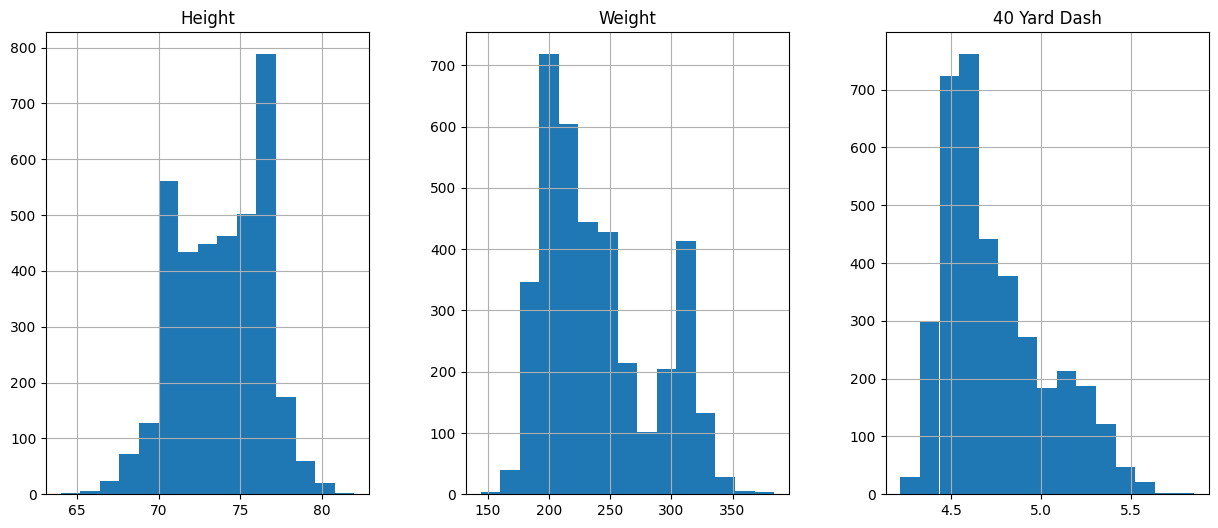

In [5]:
df[['Height', 'Weight', '40 Yard Dash']].hist(bins=15, figsize=(15, 6), layout=(1, 3))
plt.show()

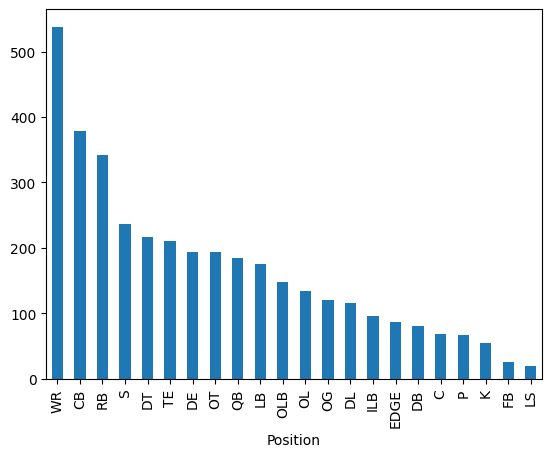

In [6]:
df['Position'].value_counts().plot(kind='bar')
plt.show()

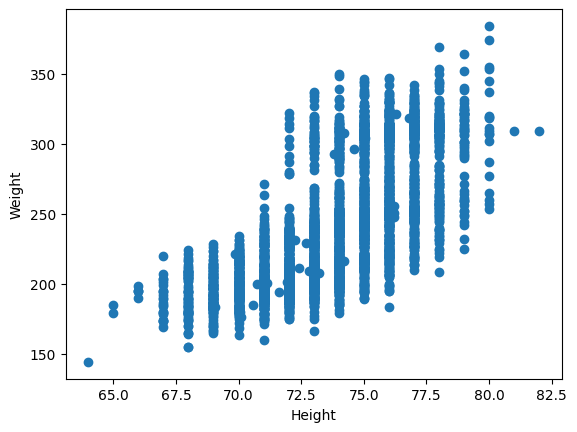

In [7]:
plt.scatter(df['Height'], df['Weight'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

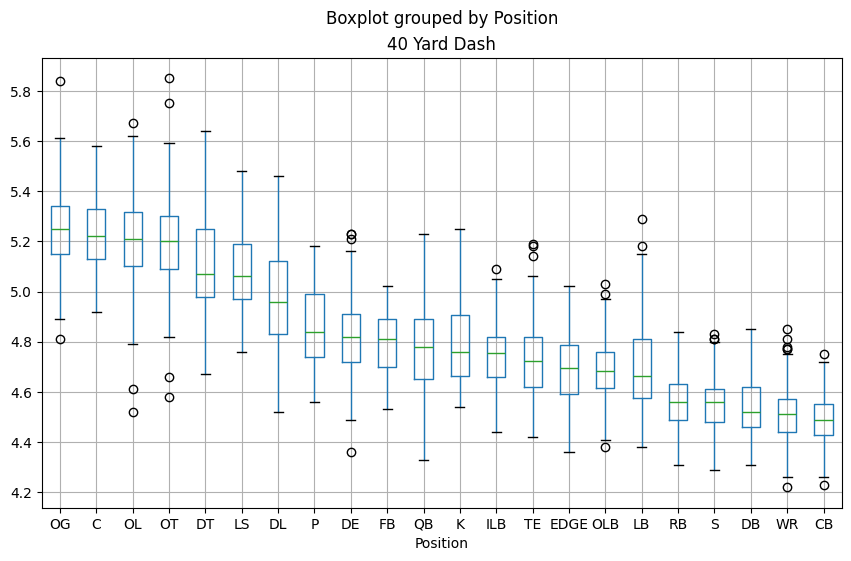

In [8]:
# Calculate the medians
medians = df.groupby(['Position'])['40 Yard Dash'].median().sort_values(ascending=False)

# Create a categorical type with the positions in the desired order
df['Position'] = pd.Categorical(df['Position'], categories=medians.index, ordered=True)

# Create the boxplot
df.sort_values(by='Position').boxplot(column='40 Yard Dash', by='Position', figsize=(10, 6))
plt.show()

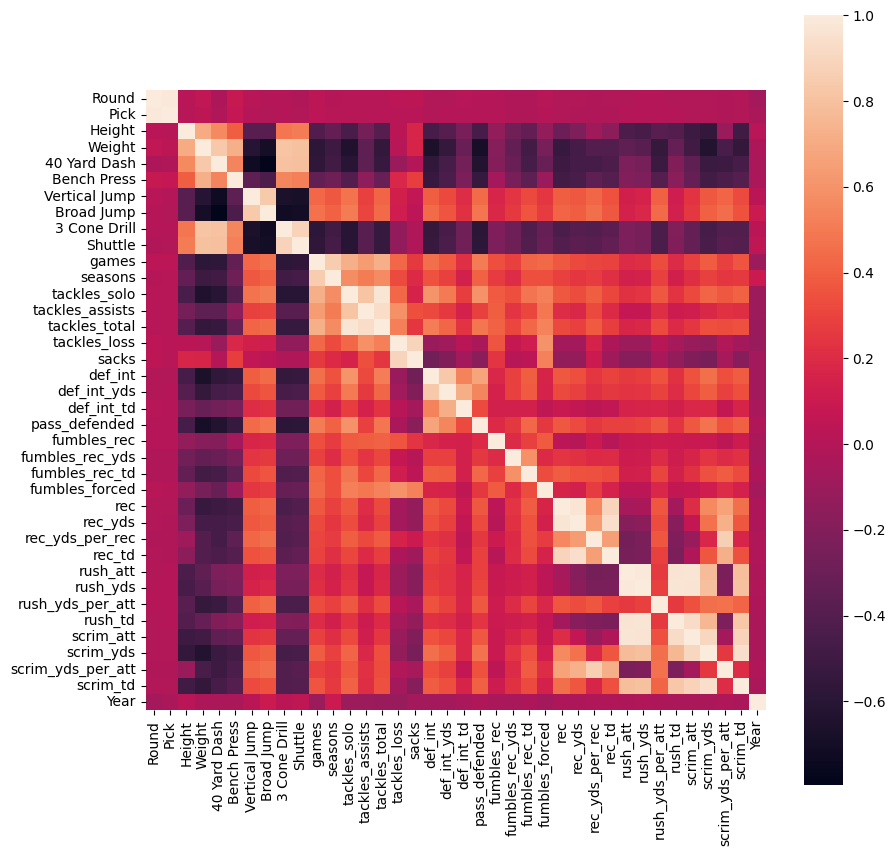

In [9]:
corr = df.select_dtypes(include=['float64', 'int64']).corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, vmax=1, square=True)
plt.show()

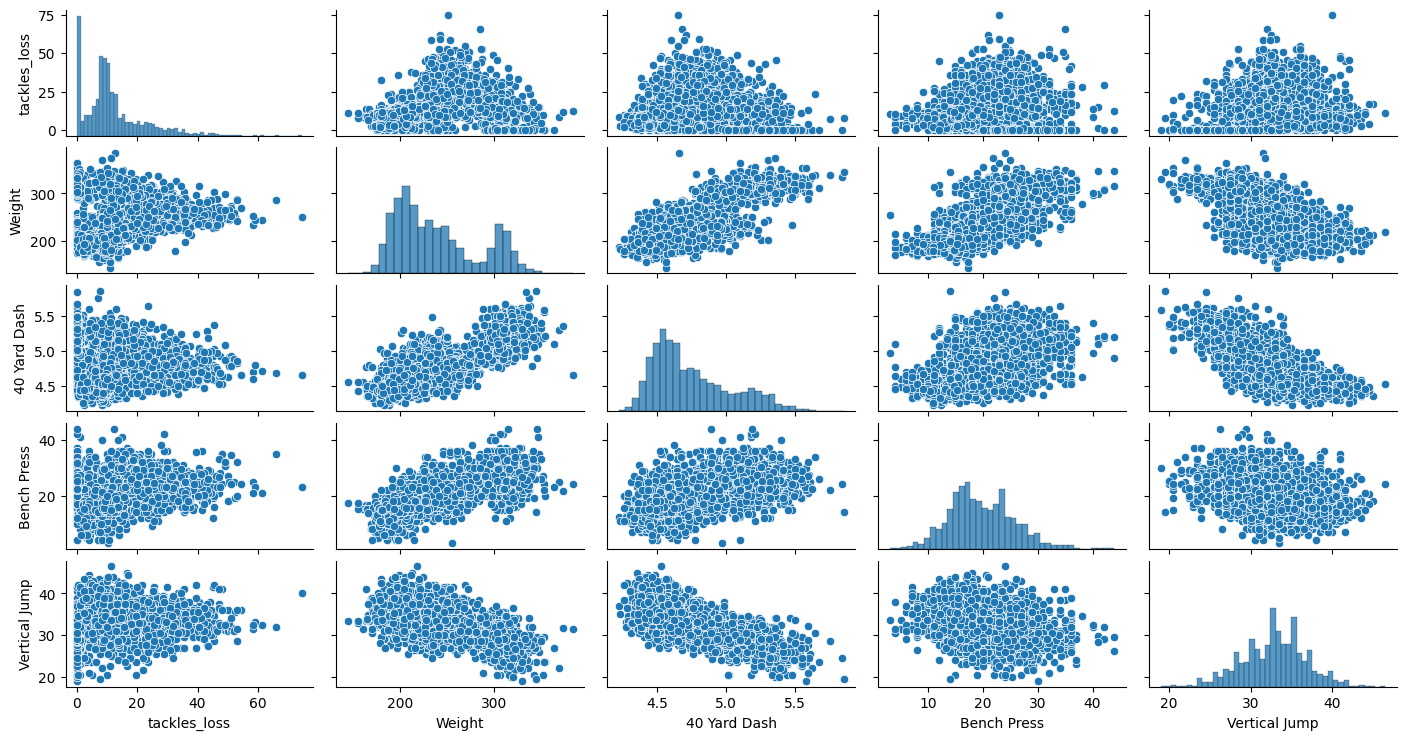

In [10]:
# Select a subset of columns to consider
subset = df[['tackles_loss', 'Weight', '40 Yard Dash', 'Bench Press', 'Vertical Jump']]
g = sns.pairplot(subset, height=1.5)

# Change the width of the entire figure
g.fig.set_figwidth(15)
plt.show()

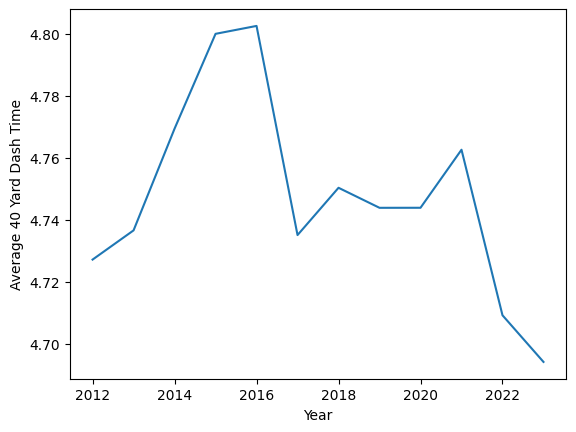

In [11]:
df.groupby('Year')['40 Yard Dash'].mean().plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Average 40 Yard Dash Time')
plt.show()

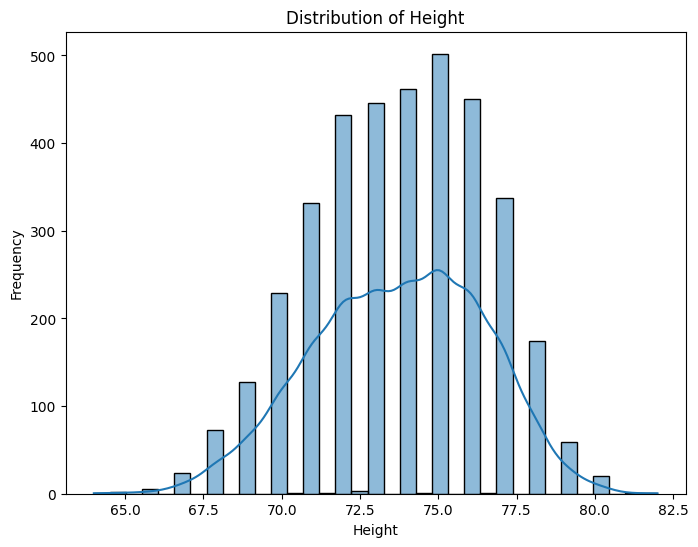

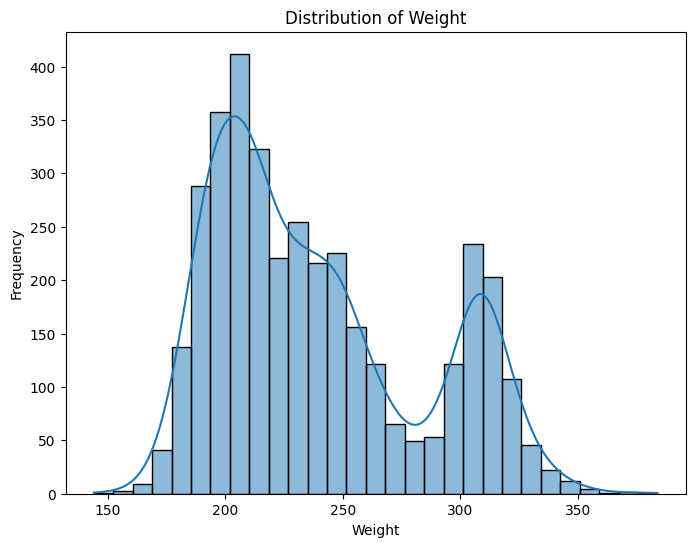

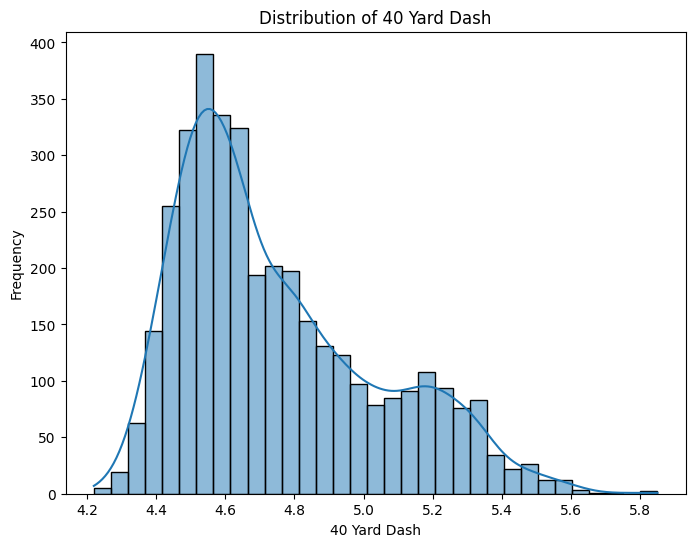

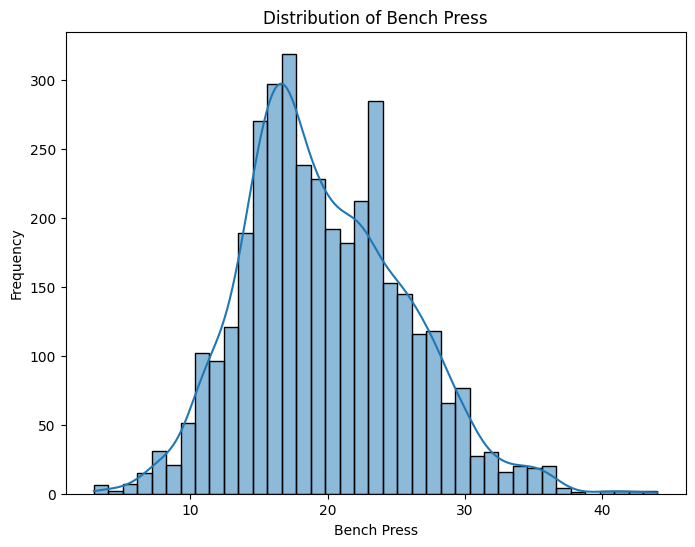

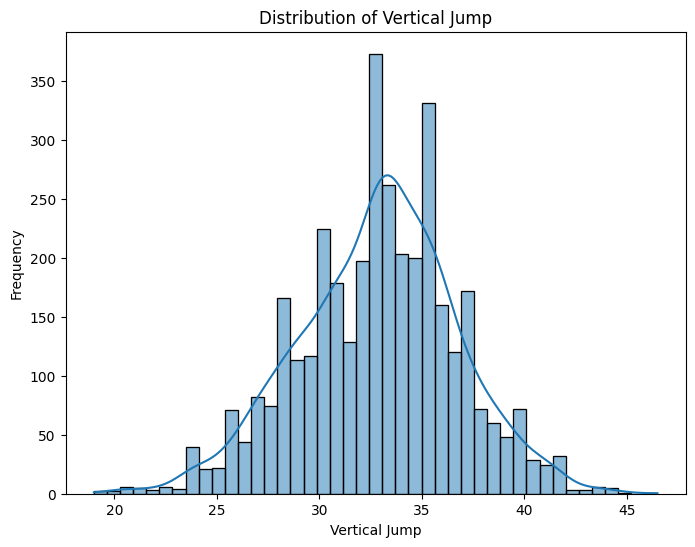

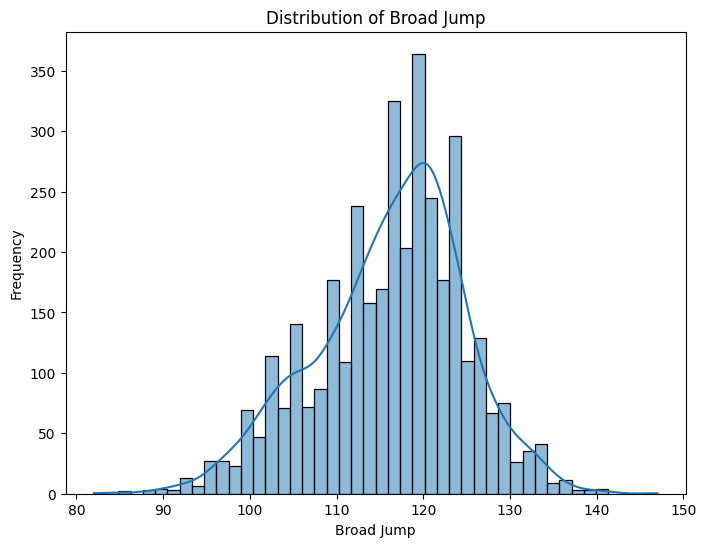

In [12]:
# Numeric features to visualize
numeric_features = ['Height', 'Weight', '40 Yard Dash', 'Bench Press', 'Vertical Jump', 'Broad Jump']

# Plotting distribution of numeric features
for feature in numeric_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

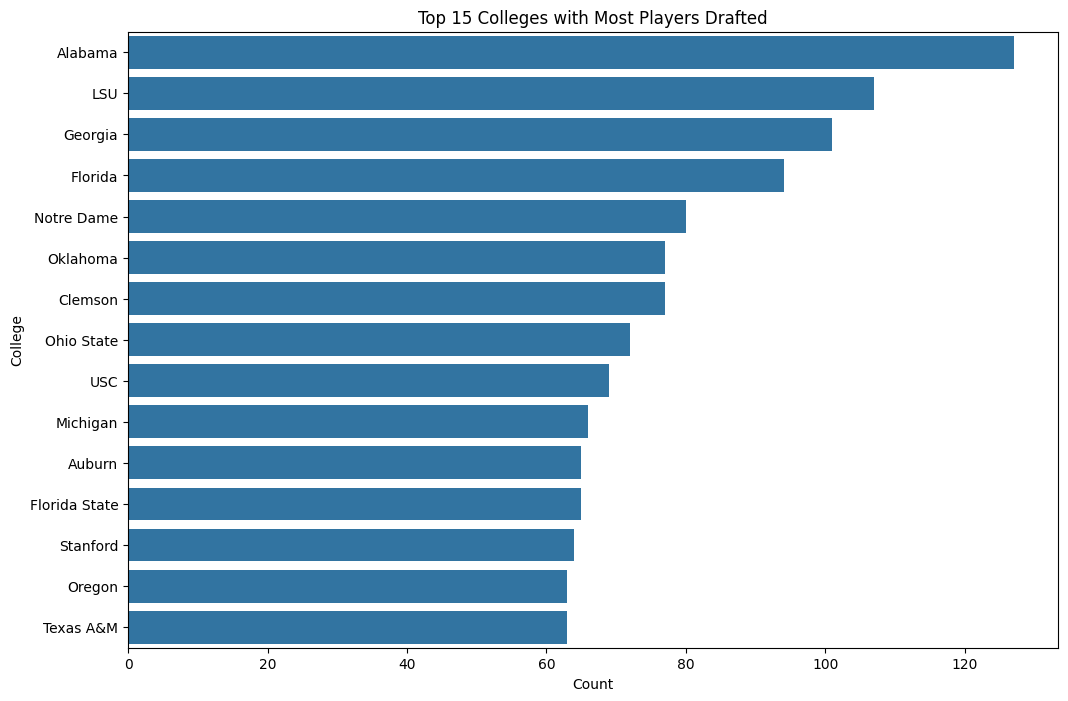

In [13]:
# Grouping by College and counting the number of players drafted from each college
college_counts = df['College'].value_counts().reset_index()
college_counts.columns = ['College', 'Count']

# Sorting colleges by the number of players drafted
college_counts = college_counts.sort_values(by='Count', ascending=False)
# Plotting the top 15 colleges with most players drafted
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='College', data=college_counts.head(15))
plt.title('Top 15 Colleges with Most Players Drafted')
plt.xlabel('Count')
plt.ylabel('College')
plt.show()

/var/folders/b2/gk83hhh92xd52bw9gsnpvk2r0000gn/T/ipykernel_10627/1591932185.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_colleges.values, y=top_colleges.index, palette='viridis')


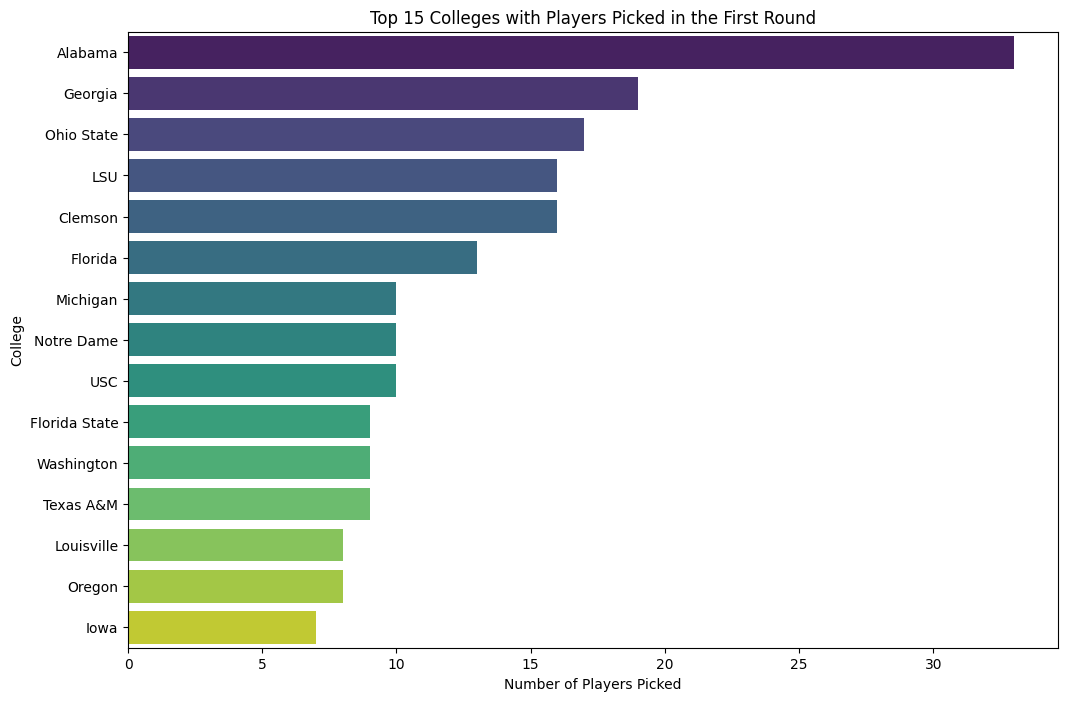

In [14]:
# Filter the DataFrame for players picked in the first round
first_round_picks = df[df['Round'] == 1]

# Count the number of players picked from each college
college_counts = first_round_picks['College'].value_counts()

# Take the top 15 colleges
top_colleges = college_counts.head(15)

# Plotting the bar plot for top 15 colleges
plt.figure(figsize=(12, 8))
sns.barplot(x=top_colleges.values, y=top_colleges.index, palette='viridis')
plt.title('Top 15 Colleges with Players Picked in the First Round')
plt.xlabel('Number of Players Picked')
plt.ylabel('College')
plt.show()